In [139]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import Image
from tensorflow import keras

In [141]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
dataset_path = "/Users/dyy/Desktop/Data"
positive_path = os.path.join(dataset_path, "Positive")
negative_path = os.path.join(dataset_path, "Negative")
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")
val_path = os.path.join(dataset_path, "validation")  # validation set path

# Function to split and move files
def split_and_move_files(class_path, class_name):
    # Create directories if they don't exist
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_path, class_name), exist_ok=True)  # For validation set

    # List all jpg files
    all_files = [f for f in os.listdir(class_path) if f.endswith('.jpg')]

    # Split files into train, test, and validation sets (60% train, 20% validation, 20% test)
    train_files, test_val_files = train_test_split(all_files, test_size=0.4, random_state=42)
    test_files, val_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

    # Move files to respective directories
    for file in train_files:
        shutil.move(os.path.join(class_path, file), os.path.join(train_path, class_name, file))

    for file in test_files:
        shutil.move(os.path.join(class_path, file), os.path.join(test_path, class_name, file))

    for file in val_files:
        shutil.move(os.path.join(class_path, file), os.path.join(val_path, class_name, file))

# Split and move files for positive and negative classes
split_and_move_files(positive_path, "Positive")
split_and_move_files(negative_path, "Negative")

print("Files have been successfully split and moved into training, testing, and validation sets.")

Files have been successfully split and moved into training, testing, and validation sets.


In [142]:
train_dir = '/Users/dyy/Desktop/Data/train/'
test_dir = '/Users/dyy/Desktop/Data/test/'
val_dir ='/Users/dyy/Desktop/Data/validation/'

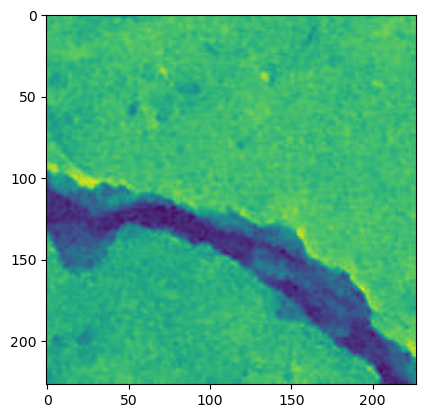

In [108]:
img_dir = '/Users/dyy/Desktop/CrackData/train/Positive/00124.jpg'
image =  plt.imread(img_dir)
#plt.imshow(image)
image = Image.open(img_dir).convert("L")
image = np.asarray(image)
plt.imshow(image)

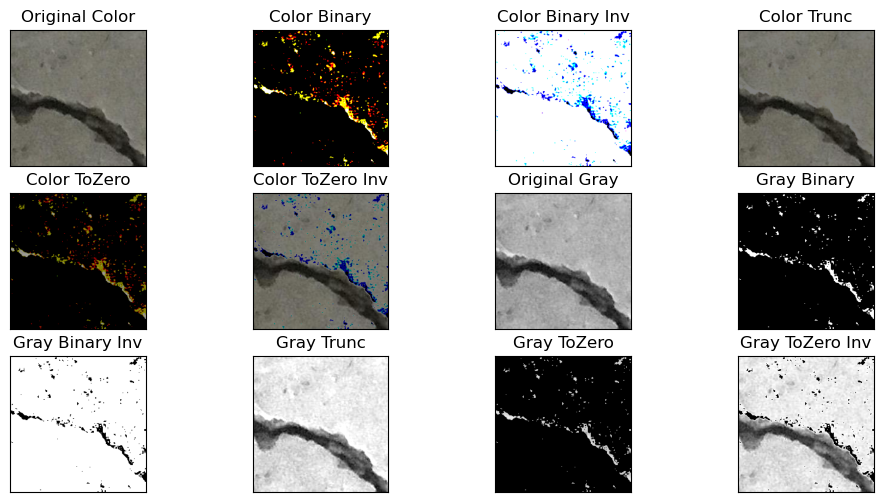

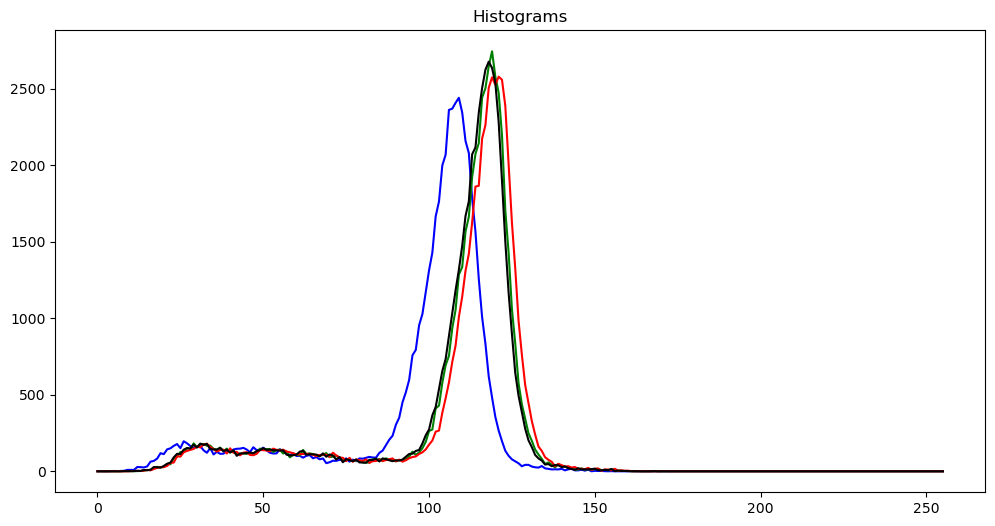

In [30]:
# Read the image in both color and grayscale
img_color = cv2.imread(img_dir)  # Default color
if img_color is None:
    raise ValueError("Image not found or path is incorrect")

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Apply thresholding to grayscale image
ret, thresh_gray1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh_gray2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh_gray3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh_gray4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh_gray5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

# Apply thresholding to color image (thresholding channel by channel)
thresh_color1 = cv2.merge([
    cv2.threshold(img_color[:,:,i], 127, 255, cv2.THRESH_BINARY)[1] for i in range(3)
])
thresh_color2 = cv2.merge([
    cv2.threshold(img_color[:,:,i], 127, 255, cv2.THRESH_BINARY_INV)[1] for i in range(3)
])
thresh_color3 = cv2.merge([
    cv2.threshold(img_color[:,:,i], 127, 255, cv2.THRESH_TRUNC)[1] for i in range(3)
])
thresh_color4 = cv2.merge([
    cv2.threshold(img_color[:,:,i], 127, 255, cv2.THRESH_TOZERO)[1] for i in range(3)
])
thresh_color5 = cv2.merge([
    cv2.threshold(img_color[:,:,i], 127, 255, cv2.THRESH_TOZERO_INV)[1] for i in range(3)
])

# Prepare titles and images for display
titles = ['Original Color', 'Color Binary', 'Color Binary Inv', 'Color Trunc', 'Color ToZero', 'Color ToZero Inv',
          'Original Gray', 'Gray Binary', 'Gray Binary Inv', 'Gray Trunc', 'Gray ToZero', 'Gray ToZero Inv']
images = [img_color, thresh_color1, thresh_color2, thresh_color3, thresh_color4, thresh_color5,
          img_gray, thresh_gray1, thresh_gray2, thresh_gray3, thresh_gray4, thresh_gray5]

# Display images
plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    if i < 6:  # First 6 are color images
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    else:  # Last 6 are grayscale images
        plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

# Histogram comparison
color_hist = [cv2.calcHist([img_color], [i], None, [256], [0,256]) for i in range(3)]
gray_hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])

plt.figure(figsize=(12, 6))
for i, col in enumerate(['b', 'g', 'r']):
    plt.plot(color_hist[i], color=col)
plt.plot(gray_hist, color='k')
plt.title('Histograms')
plt.show()

In [143]:
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)  
test_val_datagen = ImageDataGenerator(rescale=1./255)  

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(227, 227),  
    batch_size=32,
    class_mode='binary')

validation_generator = test_val_datagen.flow_from_directory(
    val_path,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary')

test_generator = test_val_datagen.flow_from_directory(
    test_path,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary')

Found 24000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [144]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(input_shape=input_shape , data_format="channels_last", kernel_size=(Wh,Ww), filters=32, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [148]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(227, 227, 3)))  # Use input_shape (227, 227, 3) for color images
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 225, 225, 32)      896       
                                                                 
 activation_40 (Activation)  (None, 225, 225, 32)      0         
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 110, 110, 32)      9248      
                                                                 
 activation_41 (Activation)  (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 55, 55, 32)        0         
 ng2D)                                                

In [149]:
epochs = 30  # Set the number of epochs

model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/30
750/750 [==============================] - 890s 1s/step - loss: 0.2539 - accuracy: 0.9112 - val_loss: 0.0562 - val_accuracy: 0.9864
Epoch 2/30
750/750 [==============================] - 949s 1s/step - loss: 0.1002 - accuracy: 0.9769 - val_loss: 0.0292 - val_accuracy: 0.9902
Epoch 3/30
750/750 [==============================] - 975s 1s/step - loss: 0.0821 - accuracy: 0.9805 - val_loss: 0.0306 - val_accuracy: 0.9916
Epoch 4/30
750/750 [==============================] - 1015s 1s/step - loss: 0.0705 - accuracy: 0.9825 - val_loss: 0.0356 - val_accuracy: 0.9893
Epoch 5/30
750/750 [==============================] - 1017s 1s/step - loss: 0.0788 - accuracy: 0.9823 - val_loss: 0.0411 - val_accuracy: 0.9899
Epoch 6/30
750/750 [==============================] - 998s 1s/step - loss: 0.0812 - accuracy: 0.9812 - val_loss: 0.0217 - val_accuracy: 0.9934
Epoch 7/30
750/750 [==============================] - 972s 1s/step - loss: 0.0685 - accuracy: 0.9849 - val_loss: 0.0218 - val_accuracy: 0.99

In [151]:
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_accuracy)

250/250 [==============================] - 89s 353ms/step - loss: 0.2243 - accuracy: 0.9744
Test accuracy: 0.9743750095367432
